In [5]:
import numpy as np
from matplotlib import rcParams, pyplot as plt
import scipy.linalg as la
%matplotlib inline

# Problem 1

In [6]:
def n(x, k, data):
    '''
    Parameters
    ----------
    x : numpy array of shape (d,)
        new sample to be classified
    k : int
        number of samples to include in neighborhood
    data : ndarray of shape (m,d)
        matrix where each row is a different data point of the training set
    
    Output
    ------
    k_hood : ndarray of shape (k,d)
        the k data points closest to x, each row of k_hood is data point. 
    indices : numpy array of shape (k,)
        the indices of the k neighborhood points in original training set, data
    '''
    distances = {}
    m = data.shape[0]
    for i in xrange(m):
        distances[i] = la.norm(x - data[i,:])
    
    k_hood = np.zeros((k,len(x)))
    indices = []
    for i in xrange(k):
        key = min(distances, key=distances.get)
        indices.append(key)
        k_hood[i,:] = data[key,:]
        del distances[key]
    
    return k_hood, np.array(indices)

In [49]:
# Toy data set. 2 centers, and we are generating clusters around them
mu1 = np.ones(2)
mu2 = -np.ones(2)
data1 = np.random.multivariate_normal(mu1, 0.1*np.eye(2), 10)
data2 = np.random.multivariate_normal(mu2, 0.1*np.eye(2), 10)
data = np.vstack((data1, data2))

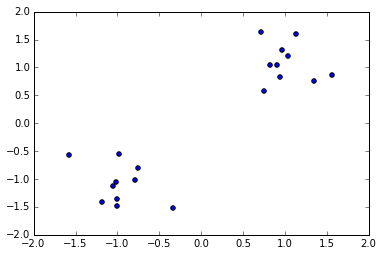

In [50]:
# Plot toy data
plt.scatter(data[:,0], data[:,1])
plt.show()

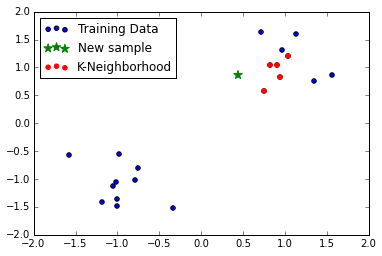

In [52]:
x = np.random.rand(2)
k_hood, indices = n(x, 5, data)
plt.scatter(data[:,0], data[:,1], label='Training Data')
plt.scatter(x[0], x[1], marker='*', color='g', s=80, label='New sample')
plt.scatter(k_hood[:,0], k_hood[:,1], color='r', label='K-Neighborhood')
plt.legend(loc='upper left')
plt.show()

# Problem 2

In [7]:
def v(x, k, data, labels):
    '''
    Parameters
    ----------
    x : numpy array of shape (d,)
        new sample to be classified
    k : int
        number of samples to include in neighborhood
    data : ndarray of shape (m,d)
        matrix where each row is a different data point of the training set
    labels : numpy array of shape (m,)
        classification of the points in data
    
    Output
    ------
    x_label : int
        classification of the new sample, x
    k_hood : ndarray of shape (k,d)
        the k data points closest to x, each row of k_hood is data point. 
    indices : numpy array of shape (k,)
        the indices of the k neighborhood points in original training set, data
    '''
    k_hood, indices = n(x, k, data)
    votes = {}
    for i in indices:
        v = labels[i]
        if v not in votes.keys():
            votes[v] = 1
        else:
            votes[v] += 1
    return max(votes, key=votes.get), k_hood, indices 
    

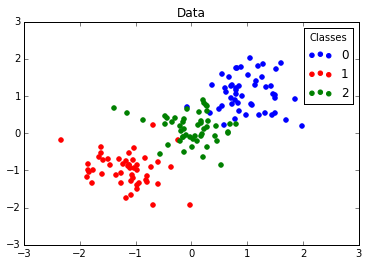

In [58]:
# Toy data set. 3 centers, and we are generating clusters around them
mu1 = np.ones(2)
mu2 = -np.ones(2)
mu3 = np.random.rand(2)
data1 = np.random.multivariate_normal(mu1, 0.2*np.eye(2), 50)
data2 = np.random.multivariate_normal(mu2, 0.2*np.eye(2), 50)
data3 = np.random.multivariate_normal(mu3, 0.2*np.eye(2), 50)
data = np.vstack((data1, np.vstack((data2, data3))))

labels = np.zeros(50)
labels = np.concatenate((labels, np.ones(50)))
labels = np.concatenate((labels, 2*np.ones(50))).astype(int)

# Plot toy data
plt.scatter(data1[:,0], data1[:,1], color='b', label='0')
plt.scatter(data2[:,0], data2[:,1], color='r', label='1')
plt.scatter(data3[:,0], data3[:,1], color='g', label='2')
plt.title('Data')
plt.legend(title='Classes')
plt.show()

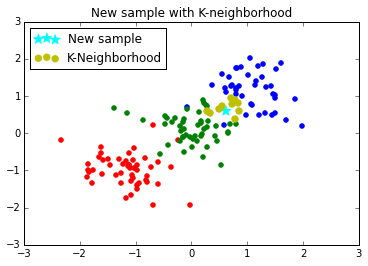

The assigned label for the new point x is: 0


In [60]:
# Get new sample and plot k-neighborhood with 
x = np.random.rand(2)
x_label, k_hood, indices  = v(x, 10, data, labels)
plt.scatter(data1[:,0], data1[:,1], color='b')
plt.scatter(data2[:,0], data2[:,1], color='r')
plt.scatter(data3[:,0], data3[:,1], color='g')
plt.scatter(x[0], x[1], marker='*', color='cyan', s=100, label='New sample')
plt.scatter(k_hood[:,0], k_hood[:,1], color='y',s=40, label='K-Neighborhood')
plt.legend(loc='upper left')
plt.title('New sample with K-neighborhood')
plt.show()

# See what the k-neighborhood vote was
print 'The assigned label for the new point x is: ' + str(x_label)

In [62]:
class KNN:
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
    
    def classify_sample(self, x, k):
        return v(x, k, self.data, self.labels)[0]
    

In [69]:
from sklearn.datasets import load_iris
iris_dict = load_iris()
iris_data = iris_dict['data']
iris_labels = iris_dict['target']
classes = iris_dict['target_names']

In [77]:
# Split iris data into training and testing (60-40 split)
tot_samples = len(iris_labels)
num = int(0.6*tot_samples)
train_indices = np.random.choice(np.arange(tot_samples), num, replace=False)
test_indices = list(set(np.arange(tot_samples)) - set(train_indices))
train_data = iris_data[train_indices]
train_labels = iris_labels[train_indices]
test_data = iris_data[test_indices]
test_labels = iris_labels[test_indices]

In [78]:
Iris_Classifier = KNN(train_data, train_labels)

In [81]:
# Classify and compare the labeling from the testing data
predicted_labels = []
k = 10
for i in xrange(test_data.shape[0]):
    predicted_labels.append(Iris_Classifier.classify_sample(test_data[i,:], k))
predicted_labels = np.array(predicted_labels)

def calc_accuracy(predicted, actual, print_=False):
    acc = float(np.sum(1*(predicted - actual == 0))) / float(len(predicted))
    if print_:
        print 'The percent correctly labeled was:'
        print acc
    return acc
acc = calc_accuracy(predicted_labels, test_labels, True)

The percent correctly labeled was:
0.966666666667


In [88]:
# Try different values of k
correct = []
for k in [2*i for i in xrange(1,20)]:
    predicted_labels = []
    for i in xrange(test_data.shape[0]):
        predicted_labels.append(Iris_Classifier.classify_sample(test_data[i,:], k))
    predicted_labels = np.array(predicted_labels)
    acc = calc_accuracy(predicted_labels, test_labels)
    correct.append([k,acc])
correct = np.array(correct)

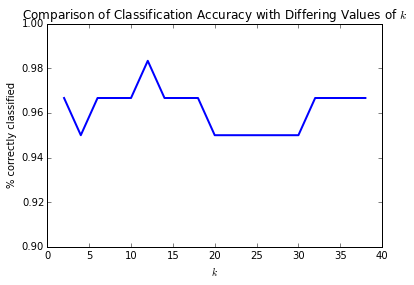

In [89]:
# Plot the accuracy
plt.plot(correct[:,0], correct[:,1], linewidth=2.0)
plt.xlabel('$k$')
plt.ylabel('% correctly classified')
plt.ylim(0.9,1.0)
plt.title('Comparison of Classification Accuracy with Differing Values of $k$')
plt.show()

# Problem 4

In [8]:
import cvxopt
from math import tanh

In [25]:
class SVM:
    '''
    Parameters
    ----------
    training_data : ndarray shape (n_samples, d)
        training data for our SVM classifier
    training_labels : numpy array shape (n_samples)
        training data's labels
    '''
    def __init__(self, training_data, training_labels):
        self.n_samples = len(training_labels)
        self.X = training_data
        self.labels = training_labels.astype(float)
        self.k = None
    
    def setKernel(self, k_method, a=0., d=2., gamma=1.5, r=1.0):
        if k_method == 'polynomial':
            def poly(x, y):
                return (np.dot(x, y) + a)**d
            self.k = poly
        elif k_method == 'radial':
            def rad(x, y):
                return np.exp(-gamma * la.norm(x - y)**2.)
            self.k = rad
        elif k_method == 'sigmoid':
            def sig(x, y):
                return tanh(np.dot(x, y) + r)
            self.k = sig
        else:
            print 'Not a valid kernel function name, defaulting to polynomial'
            def poly(x, y):
                return (np.dot(x, y) + a)**d
            self.k = poly
            
    def train(self):
        K = np.zeros((self.n_samples, self.n_samples))
        for i in xrange(self.n_samples):
            for j in xrange(self.n_samples):
                K[i,j] = self.k(self.X[i,:], self.X[j,:])
        Q = cvxopt.matrix(np.outer(self.labels, self.labels)*K)
        q = cvxopt.matrix(-1.*np.ones(self.n_samples))
        A = cvxopt.matrix(self.labels, (1,self.n_samples))
        b = cvxopt.matrix(0.0)
        G = cvxopt.matrix(np.diag(-1.*np.ones(self.n_samples)))
        h = cvxopt.matrix(np.zeros(self.n_samples))
        cvxopt.solvers.options['show_progress'] = False
        solution = cvxopt.solvers.qp(Q, q, G, h, A, b)
        self.a = np.ravel(solution['x'])
        
    def predict(self, datum):
        val = np.sum([self.a[i]*self.labels[i]*self.k(datum, self.X[i,:]) for i in xrange(self.n_samples)])
        if val > 0:
            return 1
        else:
            return -1

# Problem 5

In [10]:
import pandas as pd

In [65]:
cancer_data = pd.read_csv('cancer.csv')
cancer_data['bare-nuclei'] = pd.to_numeric(cancer_data['bare-nuclei'], errors='coerce')
cancer_data = cancer_data.dropna()
cancer_data = cancer_data.astype(float)

In [66]:
cancer_data.head()

Unnamed: 0  clump-thickness  uniformity-of-cell-size  \
0     1000025                5                        1   
1     1002945                5                        4   
2     1015425                3                        1   
3     1016277                6                        8   
4     1017023                4                        1   

   uniformity-of-cell-shape  marginal-adhesion  single-epithelial-cell-size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

   bare-nuclei  bland-chromatin  normal-nucleoli  mitoses  cancerous  
0            1                3                1        1         -1  
1           10                3                2        1         -1  
2            2                3                1        1         -1  
3            4                3                7        1         -1  
4            1                3                1        1         -1

In [113]:
n = len(cancer_data)
def split_training_test(df, num_testing):
        n = len(df)
        m = num_testing
        df['rand'] = np.random.rand(n)
        #print df
        df = df.sort_values(by='rand')
        training = df.iloc[:-num_testing].copy()
        testing = df.iloc[-num_testing:].copy()
        
        training.drop('rand', 1, inplace=True)
        testing.drop('rand', 1, inplace=True)
        return training, testing

train_data, test_data = split_training_test(cancer_data, n - int(0.6*n)) 
train_data = train_data.as_matrix()[:,1:]
test_data = test_data.as_matrix()[:,1:]


In [114]:
train_X, train_labels = train_data[:,:-1], train_data[:,-1]
test_X, test_labels = test_data[:,:-1], test_data[:,-1]

In [115]:
def calc_accuracy(predicted, actual, print_=False):
    acc = float(np.sum(1*(predicted - actual == 0))) / float(len(predicted))
    if print_:
        print 'The percent correctly labeled was:'
        print acc
    return acc

In [116]:
# We try different values for the different kernel function parameters
print 'Polynomial Kernel Function'
for _a in np.linspace(0.,3.,4):
    for _d in [1.,2.,3.]:
        print 'a = ' + str(_a) + ', d = ' + str(_d)
        poly_SVM = SVM(train_X, train_labels)
        poly_SVM.setKernel('polynomial', a=_a, d=_d)
        poly_SVM.train()
        predicted = [] 
        for i in xrange(test_X.shape[0]):
            predicted.append(poly_SVM.predict(test_X[i,:]))
        acc = calc_accuracy(np.array(predicted), test_labels)
        print '\taccuracy = ' + str(float(int(acc*1000))/10.) + '%'
        

Polynomial Kernel Function
a = 0.0, d = 1.0
Terminated (singular KKT matrix).
	accuracy = 63.5%
a = 0.0, d = 2.0
	accuracy = 44.5%
a = 0.0, d = 3.0
	accuracy = 50.0%
a = 1.0, d = 1.0
Terminated (singular KKT matrix).
	accuracy = 65.6%
a = 1.0, d = 2.0
	accuracy = 79.9%
a = 1.0, d = 3.0
	accuracy = 44.5%
a = 2.0, d = 1.0
Terminated (singular KKT matrix).
	accuracy = 64.9%
a = 2.0, d = 2.0
	accuracy = 70.8%
a = 2.0, d = 3.0
	accuracy = 45.6%
a = 3.0, d = 1.0
Terminated (singular KKT matrix).
	accuracy = 67.1%
a = 3.0, d = 2.0
	accuracy = 70.4%
a = 3.0, d = 3.0
	accuracy = 50.3%


In [120]:
print 'Radial Basis Kernel Function'
for _gamma in np.linspace(0.5,3., 5):
    print 'gamma = ' + str(_gamma)
    rad_SVM = SVM(train_X, train_labels)
    rad_SVM.setKernel('radial', gamma=_gamma)
    rad_SVM.train()
    predicted = [] 
    for i in xrange(test_X.shape[0]):
        predicted.append(rad_SVM.predict(test_X[i,:]))
    acc = calc_accuracy(np.array(predicted), test_labels)
    print '\taccuracy = ' + str(float(int(acc*1000))/10.) + '%'

Radial Basis Kernel Function
gamma = 0.5
	accuracy = 96.7%
gamma = 1.125
	accuracy = 95.9%
gamma = 1.75
	accuracy = 95.9%
gamma = 2.375
	accuracy = 95.9%
gamma = 3.0
	accuracy = 95.9%


In [122]:
print 'Sigmoid Kernel Function'
for _r in np.linspace(0.,6.,6):
    print 'r = ' + str(_r)
    sig_SVM = SVM(train_X, train_labels)
    sig_SVM.setKernel('sigmoid', r=_r)
    sig_SVM.train()
    predicted = [] 
    for i in xrange(test_X.shape[0]):
        predicted.append(sig_SVM.predict(test_X[i,:]))
    acc = calc_accuracy(np.array(predicted), test_labels)
    print '\taccuracy = ' + str(float(int(acc*1000))/10.) + '%'

Sigmoid Kernel Function
r = 0.0
Terminated (singular KKT matrix).
	accuracy = 35.4%
r = 1.2
Terminated (singular KKT matrix).
	accuracy = 18.6%
r = 2.4
Terminated (singular KKT matrix).
	accuracy = 35.4%
r = 3.6
Terminated (singular KKT matrix).
	accuracy = 35.4%
r = 4.8
Terminated (singular KKT matrix).
	accuracy = 37.5%
r = 6.0
Terminated (singular KKT matrix).
	accuracy = 35.4%


In [ ]:
''' Previous try on splitting up data... why not work??
n = len(cancer_data)
train_ind = np.sort(np.random.choice(np.arange(n), size= int(0.6*n), replace=False))
test_ind = np.sort(list(set(np.arange(n)) - set(train_ind)))
train_data = cancer_data.loc[train_ind].as_matrix()[:,1:-1]
test_data = cancer_data.loc[test_ind].as_matrix()[:,1:-1]

train_X, train_labels = train_data[:,:-1], train_data[:,-1]
test_X, test_labels = test_data[:,:-1], test_data[:,-1]

# We try different values for the different kernel function parameters
print 'Polynomial Kernel Function'
for _a in np.linspace(0.,3.,4):
    for _d in [1.,2.,3.]:
        print 'a = ' + str(_a) + ', d = ' + str(_d)
        poly_SVM = SVM(train_X, train_labels)
        poly_SVM.setKernel('polynomial', a=_a, d=_d)
        poly_SVM.train()
        predicted = [] 
        for i in xrange(test_X.shape[0]):
            predicted.append(poly_SVM.predict(test_X[i,:]))
        acc = calc_accuracy(np.array(predicted), test_labels)
        print '\taccuracy = ' + str(float(int(acc*1000))/10.) + '%'
'''